In [1]:
#importing librarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing data
data=pd.read_csv('BreastCancer.csv')
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [3]:
#one unncessary column is there delete that 
del data['Unnamed: 32']


In [4]:
print(data.shape)

(569, 32)


In [5]:
#seperating the dependent and independent variables
y=data.iloc[:,1].values
x=data.iloc[:,2:].values

#encoding the target variables
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y=encoder.fit_transform(y)

#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

#splitting the data into train and test datasets inthe ratio of 70:30
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(398, 30) (171, 30) (398,) (171,)


# step-2:Model Building

# KNN ALGORITHM

In [6]:
from sklearn.neighbors import KNeighborsClassifier  #importing knn library
knn=KNeighborsClassifier(n_neighbors=5) #instantiating the model
knn.fit(x_train,y_train) #fitting the model
knn_pred_test=knn.predict(x_test) # generating predictions over the test data
knn_pred_proba=knn.predict_proba(x_test) #genearating probability preictions over the test data

# STEP-3: Model Evaluation Metrics

the mean cross_val_score of KNN algorithm is: 0.9647435897435898
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       108
           1       0.98      0.90      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

accuracy_score of knn algorithm is: 0.9590643274853801


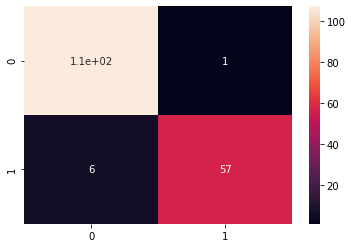

In [7]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
cvs=cross_val_score(knn,x_train,y_train,scoring="accuracy",cv=10)
print("the mean cross_val_score of KNN algorithm is:",cvs.mean())
cm=confusion_matrix(y_test,knn_pred_test)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,knn_pred_test))
print("accuracy_score of knn algorithm is:",accuracy_score(y_test,knn_pred_test))








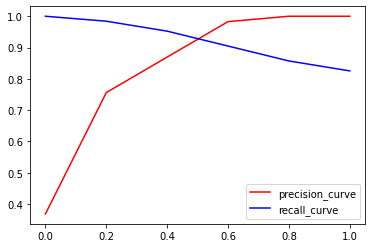

In [8]:
#precision_recall_curve
from sklearn.metrics import precision_recall_curve as prc
precision_points,recall_points,threshold_points=prc(y_test,knn_pred_proba[:,1])
plt.plot(threshold_points,precision_points[:-1],label='precision_curve',color='red')
plt.plot(threshold_points,recall_points[:-1],label="recall_curve",color='blue')
plt.legend()
plt.show()
#the below intersection is near 0.5, which is a very good threshold

# from here we simultaneously use step2 and step3 for different algorithms

the cross_val_score of naive_bayes is: 0.9347435897435897
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       108
           1       0.86      0.90      0.88        63

    accuracy                           0.91       171
   macro avg       0.90      0.91      0.91       171
weighted avg       0.91      0.91      0.91       171

teh accuracy_score of naive_bayes is: 0.9122807017543859


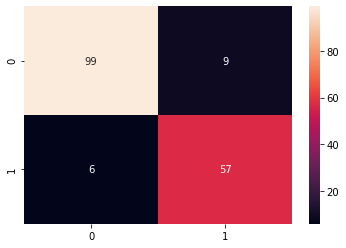

In [9]:
#Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
nb=GaussianNB()
nb.fit(x_train,y_train)
nb_pred_test=nb.predict(x_test)
nb_pred_proba=nb.predict_proba(x_test)

#metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
import seaborn as sns
cvs=cross_val_score(nb,x_train,y_train,scoring='accuracy',cv=10)
print("the cross_val_score of naive_bayes is:",cvs.mean())
cm=confusion_matrix(y_test,nb_pred_test)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,nb_pred_test))
print("teh accuracy_score of naive_bayes is:",accuracy_score(y_test,nb_pred_test))



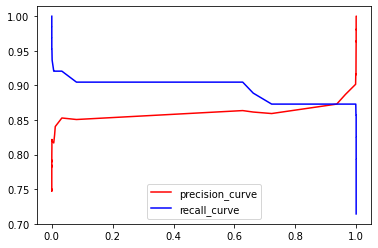

In [10]:
#precision_recall_curve
from sklearn.metrics import precision_recall_curve as prc
precision_points,recall_points,threshold_points=prc(y_test,nb_pred_proba[:,1])
plt.plot(threshold_points,precision_points[:-1],label="precision_curve",color='red')
plt.plot(threshold_points,recall_points[:-1],label='recall_curve',color='blue')
plt.legend()
plt.show()

#the intersection of the belowplot is at 1 which is a very bad threshold

the coss_val_score of svm is: 0.9800000000000001
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

the accuracy score of svm is: 0.9766081871345029


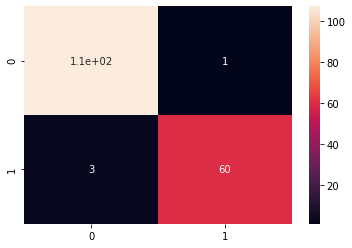

In [11]:
#support vector machine
from sklearn.svm import SVC,LinearSVC
svm=SVC(probability=True)
svm.fit(x_train,y_train)
svm_pred_test=svm.predict(x_test)
svm_pred_proba=svm.predict_proba(x_test)

#metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
cvs=cross_val_score(svm,x_train,y_train,scoring='accuracy',cv=10)
print("the coss_val_score of svm is:",cvs.mean())
cm=confusion_matrix(y_test,svm_pred_test)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,svm_pred_test))
print("the accuracy score of svm is:",accuracy_score(y_test,svm_pred_test))

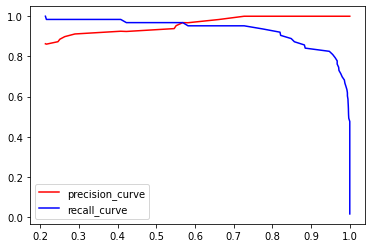

In [12]:
#precision_recall_curve
from sklearn.metrics import precision_recall_curve as prc
precision_points,recall_points,threshold_points=prc(y_test,svm_pred_proba[:,1])
plt.plot(threshold_points,precision_points[:-1],label='precision_curve',color='red')
plt.plot(threshold_points,recall_points[:-1],label='recall_curve',color='blue')
plt.legend()
plt.show()

#the intersection is between 0.5 and 0.6 which is a goo threshold

the  mean cross_val_score of LogisticRegression is: 0.9798717948717949
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

the accuracy_score of logistic Regression is: 0.9766081871345029


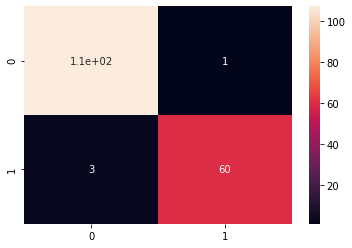

In [13]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_pred_test=lr.predict(x_test)
lr_pred_proba=lr.predict_proba(x_test)

#metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
import seaborn as sns
cm=confusion_matrix(y_test,lr_pred_test)
sns.heatmap(cm,annot=True)
cvs=cross_val_score(lr,x_train,y_train,cv=10,scoring='accuracy')
print("the  mean cross_val_score of LogisticRegression is:",cvs.mean())
print(classification_report(y_test,lr_pred_test))
print("the accuracy_score of logistic Regression is:",accuracy_score(y_test,lr_pred_test))

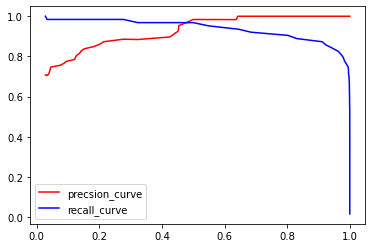

In [14]:
#precision_recall_curve
from sklearn.metrics import precision_recall_curve as prc
precision_points,recall_points,threshold_points=prc(y_test,lr_pred_proba[:,1])
plt.plot(threshold_points, precision_points[:-1],label='precsion_curve',color='red')
plt.plot(threshold_points, recall_points[:-1],label='recall_curve',color='blue')
plt.legend()
plt.show()
#the belowintersection is at 0.5 which is a very good threshold

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       108
           1       0.85      0.95      0.90        63

    accuracy                           0.92       171
   macro avg       0.91      0.93      0.91       171
weighted avg       0.92      0.92      0.92       171

the meancross_val_score of DecisionTree is: 0.9095512820512821
accuracy_score of logisticRegression is: 0.9181286549707602


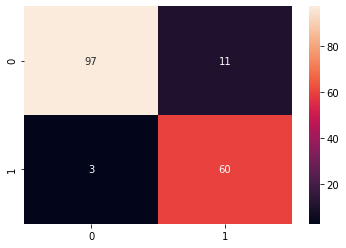

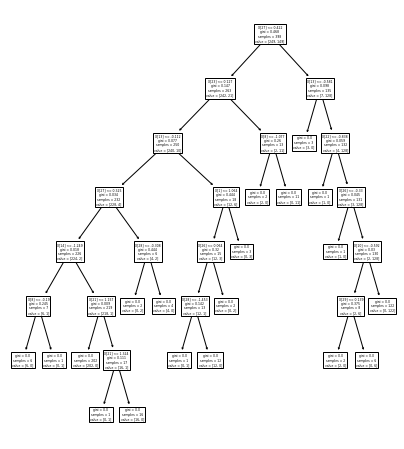

In [15]:
#Decision Tree classifier

from sklearn.tree import DecisionTreeClassifier as DTC
dt=DTC()
dt.fit(x_train,y_train)
dt_pred_train=dt.predict(x_train)
dt_pred_test=dt.predict(x_test)
dt_pred_proba=dt.predict_proba(x_test)

#metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
cm=confusion_matrix(y_test,dt_pred_test)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,dt_pred_test))
cvs=cross_val_score(dt,x_train,y_train,cv=10,scoring='accuracy')
print("the meancross_val_score of DecisionTree is:",cvs.mean())
print("accuracy_score of logisticRegression is:",accuracy_score(y_test,dt_pred_test))

#tree diagram
from sklearn import tree
plt.figure(figsize=(7,8))
_=tree.plot_tree(dt)

In [16]:
# now the above metrics of decision tree results in Pruning/Overfitting,
#for this we try to optimize the best parameters, known as HyperParameter Tuning/Optimization
# to get the best parameters we use RnadomizedSearchCV/GridSearchCV

params={
    'criterion'    : ['gini','entropy'],
    'max_depth'    : [2,3,4]
}

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
grid_search=GridSearchCV(dt,param_grid=params)
grid_search.fit(x_train,y_train)

print(grid_search.best_score_)
print(grid_search.best_params_)

0.9322468354430381
{'criterion': 'entropy', 'max_depth': 4}


              precision    recall  f1-score   support

           0       0.97      0.94      0.95       108
           1       0.90      0.95      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171

the meancross_val_score of DecisionTree is: 0.9146153846153847
accuracy_score of logisticRegression is: 0.9415204678362573


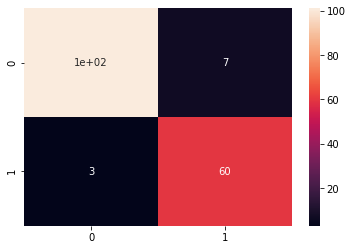

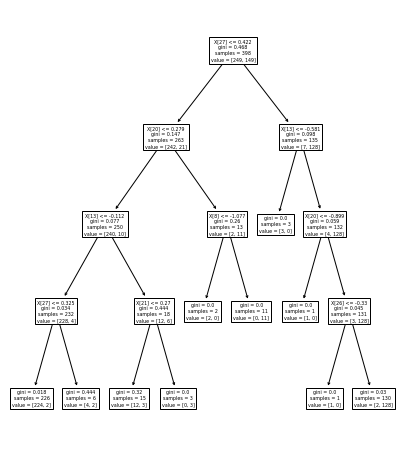

In [17]:
#decsion trees-applying thehyperparameter tuning
from sklearn.tree import DecisionTreeClassifier as DTC
dt=DTC(criterion='gini', max_depth=4)
dt.fit(x_train,y_train)
dt_pred_train=dt.predict(x_train)
dt_pred_test=dt.predict(x_test)
dt_pred_proba=dt.predict_proba(x_test)

#metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
cm=confusion_matrix(y_test,dt_pred_test)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,dt_pred_test))
cvs=cross_val_score(dt,x_train,y_train,cv=10,scoring='accuracy')
print("the meancross_val_score of DecisionTree is:",cvs.mean())
print("accuracy_score of logisticRegression is:",accuracy_score(y_test,dt_pred_test))

#tree diagram
from sklearn import tree
plt.figure(figsize=(7,8))
_=tree.plot_tree(dt)

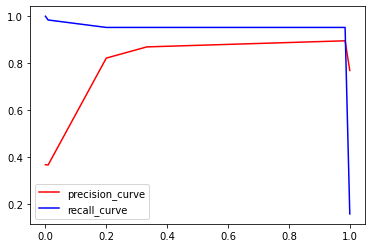

In [18]:
#precision_recall_curve
from sklearn.metrics import precision_recall_curve as prc
precision_points, recall_points, threshold_points=prc(y_test,dt_pred_proba[:,1])
plt.plot(threshold_points,precision_points[:-1],label='precision_curve',color='red')
plt.plot(threshold_points,recall_points[:-1],label='recall_curve',color='blue')
plt.legend()
plt.show()

#the intersection is at 1, which is a very bad threshold

 the mean cross_val_score of rf is 0.9548717948717949
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       149

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       108
           1       0.94      0.98      0.96        63

    accuracy                           0.97       171
   macro avg       0.96      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

the accuracy_score of rf is 0.9707602339181286


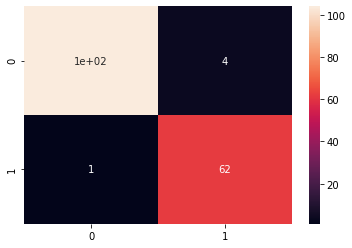

In [19]:
#Random Forest classifier
from sklearn.ensemble import RandomForestClassifier as RFC
rf=RFC()
rf.fit(x_train,y_train)
rf_pred_train=rf.predict(x_train)
rf_pred_test=rf.predict(x_test)
rf_pred_proba=rf.predict_proba(x_test)

#metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
cvs=cross_val_score(rf,x_train,y_train,scoring='accuracy',cv=10)
print(" the mean cross_val_score of rf is",cvs.mean())
cm=confusion_matrix(y_test,rf_pred_test)
sns.heatmap(cm,annot=True)
print(classification_report(y_train,rf_pred_train))
print(classification_report(y_test,rf_pred_test))
print("the accuracy_score of rf is",accuracy_score(y_test,rf_pred_test))

In [20]:
#now the above problem is overfitting, to avoid this we tune the hyperparamaeters
#Hyperparameter tuning
params={
    'n_estimators'   :  [10,20,50,100,200],
    'max_depth'      :  [2,3,4,5,6],
    'criterion'      :  ['gini','entropy']
    
}

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
random_search=RandomizedSearchCV(rf,param_distributions=params,verbose=3)
random_search.fit(x_train,y_train)

print(random_search.best_estimator_)
print(random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=200, max_depth=5, criterion=gini ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, max_depth=5, criterion=gini, score=0.963, total=   3.0s
[CV] n_estimators=200, max_depth=5, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV]  n_estimators=200, max_depth=5, criterion=gini, score=0.900, total=   2.2s
[CV] n_estimators=200, max_depth=5, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.1s remaining:    0.0s


[CV]  n_estimators=200, max_depth=5, criterion=gini, score=0.963, total=   2.3s
[CV] n_estimators=200, max_depth=5, criterion=gini ...................
[CV]  n_estimators=200, max_depth=5, criterion=gini, score=0.949, total=   2.2s
[CV] n_estimators=200, max_depth=5, criterion=gini ...................
[CV]  n_estimators=200, max_depth=5, criterion=gini, score=0.949, total=   2.2s
[CV] n_estimators=20, max_depth=6, criterion=entropy .................
[CV]  n_estimators=20, max_depth=6, criterion=entropy, score=0.975, total=   0.3s
[CV] n_estimators=20, max_depth=6, criterion=entropy .................
[CV]  n_estimators=20, max_depth=6, criterion=entropy, score=0.912, total=   0.3s
[CV] n_estimators=20, max_depth=6, criterion=entropy .................
[CV]  n_estimators=20, max_depth=6, criterion=entropy, score=0.938, total=   0.3s
[CV] n_estimators=20, max_depth=6, criterion=entropy .................
[CV]  n_estimators=20, max_depth=6, criterion=entropy, score=0.962, total=   0.3s
[CV] n

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   32.9s finished


 the mean cross_val_score of rf is 0.9573717948717949
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       249
           1       1.00      0.98      0.99       149

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       108
           1       0.94      0.95      0.94        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

the accuracy_score of rf is 0.9590643274853801


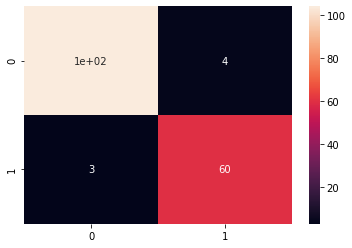

In [21]:
#Applying Hyper parameter tuning 
from sklearn.ensemble import RandomForestClassifier as RFC
rf=RFC(n_estimators=100,max_depth=5,criterion='gini')
rf.fit(x_train,y_train)
rf_pred_train=rf.predict(x_train)
rf_pred_test=rf.predict(x_test)
rf_pred_proba=rf.predict_proba(x_test)

#metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
cvs=cross_val_score(rf,x_train,y_train,scoring='accuracy',cv=10)
print(" the mean cross_val_score of rf is",cvs.mean())
cm=confusion_matrix(y_test,rf_pred_test)
sns.heatmap(cm,annot=True)
print(classification_report(y_train,rf_pred_train))
print(classification_report(y_test,rf_pred_test))
print("the accuracy_score of rf is",accuracy_score(y_test,rf_pred_test))

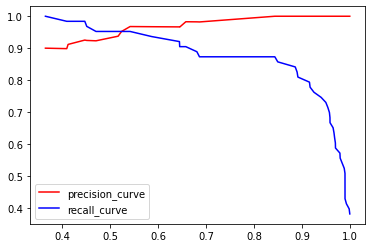

In [22]:
#precision_recall_curve
from sklearn.metrics import precision_recall_curve as prc
precision_points,recall_points,threshold_points=prc(y_test,rf_pred_proba[:,1])
plt.plot(threshold_points,precision_points[:-1],label="precision_curve",color='red')
plt.plot(threshold_points,recall_points[:-1],label='recall_curve',color='blue')
plt.legend()
plt.show()

#the below intersection is near 0.5, which is a good threshold

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       149

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       108
           1       0.94      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

the mean cross_val_score of adaboost is: 0.9547435897435899
the accuracy score of adaboost is: 0.9649122807017544


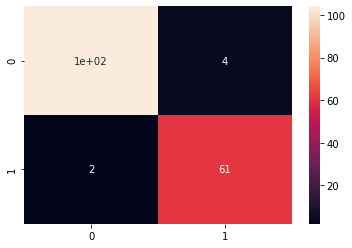

In [23]:
#Adaboostclassifier

from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
ada_pred_train=ada.predict(x_train)
ada_pred_test=ada.predict(x_test)
ada_pred_proba=ada.predict_proba(x_test)

#metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import seaborn as sns
from sklearn.model_selection import cross_val_score
cm=confusion_matrix(y_test,ada_pred_test)
sns.heatmap(cm,annot=True)
print(classification_report(y_train,ada_pred_train))
print(classification_report(y_test,ada_pred_test))
cvs=cross_val_score(ada,x_train,y_train,cv=10,scoring='accuracy')
print("the mean cross_val_score of adaboost is:",cvs.mean())
print("the accuracy score of adaboost is:",accuracy_score(y_test,ada_pred_test))

In [24]:
#the above metrics results in overfitting of the model,
#to avoid this, we use HyperPrameter Tuning
params={
    'n_estimators'    :  [20,30,50,100.150],
    'learning_rate'   :  [0.1,0.01,0.5,0.7]
}

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
random_search=RandomizedSearchCV(ada,param_distributions=params,scoring='accuracy',n_jobs=1,n_iter=3,verbose=3)
random_search.fit(x_train,y_train)

print(random_search.best_estimator_)
print(random_search.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] n_estimators=30, learning_rate=0.1 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. n_estimators=30, learning_rate=0.1, score=0.963, total=   0.6s
[CV] n_estimators=30, learning_rate=0.1 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] .. n_estimators=30, learning_rate=0.1, score=0.912, total=   0.5s
[CV] n_estimators=30, learning_rate=0.1 ..............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV] .. n_estimators=30, learning_rate=0.1, score=0.938, total=   0.5s
[CV] n_estimators=30, learning_rate=0.1 ..............................
[CV] .. n_estimators=30, learning_rate=0.1, score=0.937, total=   0.5s
[CV] n_estimators=30, learning_rate=0.1 ..............................
[CV] .. n_estimators=30, learning_rate=0.1, score=0.924, total=   0.5s
[CV] n_estimators=20, learning_rate=0.7 ..............................
[CV] .. n_estimators=20, learning_rate=0.7, score=0.975, total=   0.3s
[CV] n_estimators=20, learning_rate=0.7 ..............................
[CV] .. n_estimators=20, learning_rate=0.7, score=0.925, total=   0.3s
[CV] n_estimators=20, learning_rate=0.7 ..............................
[CV] .. n_estimators=20, learning_rate=0.7, score=0.975, total=   0.3s
[CV] n_estimators=20, learning_rate=0.7 ..............................
[CV] .. n_estimators=20, learning_rate=0.7, score=0.937, total=   0.3s
[CV] n_estimators=20, learning_rate=0.7 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    5.8s finished


AdaBoostClassifier(learning_rate=0.7, n_estimators=20)
{'n_estimators': 20, 'learning_rate': 0.7}


              precision    recall  f1-score   support

           0       0.94      0.98      0.96       249
           1       0.96      0.89      0.92       149

    accuracy                           0.94       398
   macro avg       0.95      0.93      0.94       398
weighted avg       0.95      0.94      0.94       398

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       108
           1       0.98      0.87      0.92        63

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171

the mean cross_val_score of adaboost is: 0.9169871794871796
the accuracy score of adaboost is: 0.9473684210526315


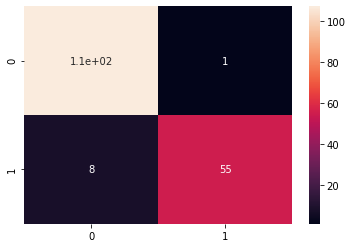

In [25]:
#applying the Hyperparameter estimator for AdaBoostclassifier
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=50,learning_rate=0.01)
ada.fit(x_train,y_train)
ada_pred_train=ada.predict(x_train)
ada_pred_test=ada.predict(x_test)
ada_pred_proba=ada.predict_proba(x_test)

#metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import seaborn as sns
from sklearn.model_selection import cross_val_score
cm=confusion_matrix(y_test,ada_pred_test)
sns.heatmap(cm,annot=True)
print(classification_report(y_train,ada_pred_train))
print(classification_report(y_test,ada_pred_test))
cvs=cross_val_score(ada,x_train,y_train,cv=10,scoring='accuracy')
print("the mean cross_val_score of adaboost is:",cvs.mean())
print("the accuracy score of adaboost is:",accuracy_score(y_test,ada_pred_test))

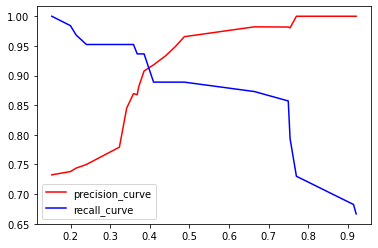

In [26]:
#precision_recall_curve
from sklearn.metrics import precision_recall_curve as prc
precision_points,recall_points,threshold_points=prc(y_test,ada_pred_proba[:,1])
plt.plot(threshold_points,precision_points[:-1],label="precision_curve",color='red')
plt.plot(threshold_points,recall_points[:-1],label='recall_curve',color='blue')
plt.legend()
plt.show()

#the below intersection is near to 0.4, which is some what good threshold

the cross_val_score is: 0.9448076923076923
the accuracy_score is: 0.9766081871345029
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       149

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



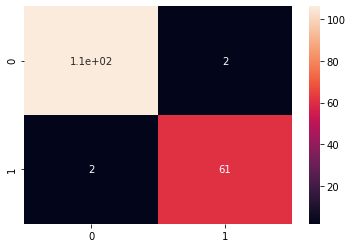

In [39]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
gb_pred_train=gb.predict(x_train)
gb_pred_test=gb.predict(x_test)
gb_pred_proba=gb.predict_proba(x_test)

#metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(gb,x_train,y_train,scoring='accuracy',cv=10)
print("the cross_val_score is:",cvs.mean())
cm=confusion_matrix(y_test,gb_pred_test)
sns.heatmap(cm,annot=True)
print("the accuracy_score is:",accuracy_score(y_test,gb_pred_test))
print(classification_report(y_train,gb_pred_train))
print(classification_report(y_test,gb_pred_test))

In [41]:
#hyperparameter tuning
params={
    'n_estimators'    :  [10,20,30,50,100],
    'learning_rate'   :  [0.1,0.2,0.3,0.4,0.5],
    'max_depth'       :  [3,4,5,6]
}

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
random_search=RandomizedSearchCV(gb,param_distributions=params,n_jobs=1,n_iter=3,verbose=3)
random_search.fit(x_train,y_train)

print(random_search.best_estimator_)
print(random_search.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] n_estimators=100, max_depth=6, learning_rate=0.2 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, max_depth=6, learning_rate=0.2, score=0.925, total=   2.9s
[CV] n_estimators=100, max_depth=6, learning_rate=0.2 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV]  n_estimators=100, max_depth=6, learning_rate=0.2, score=0.912, total=   2.5s
[CV] n_estimators=100, max_depth=6, learning_rate=0.2 ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.3s remaining:    0.0s


[CV]  n_estimators=100, max_depth=6, learning_rate=0.2, score=0.925, total=   2.7s
[CV] n_estimators=100, max_depth=6, learning_rate=0.2 ................
[CV]  n_estimators=100, max_depth=6, learning_rate=0.2, score=0.924, total=   2.8s
[CV] n_estimators=100, max_depth=6, learning_rate=0.2 ................
[CV]  n_estimators=100, max_depth=6, learning_rate=0.2, score=0.899, total=   2.9s
[CV] n_estimators=10, max_depth=3, learning_rate=0.3 .................
[CV]  n_estimators=10, max_depth=3, learning_rate=0.3, score=0.950, total=   0.2s
[CV] n_estimators=10, max_depth=3, learning_rate=0.3 .................
[CV]  n_estimators=10, max_depth=3, learning_rate=0.3, score=0.912, total=   0.2s
[CV] n_estimators=10, max_depth=3, learning_rate=0.3 .................
[CV]  n_estimators=10, max_depth=3, learning_rate=0.3, score=0.938, total=   0.2s
[CV] n_estimators=10, max_depth=3, learning_rate=0.3 .................
[CV]  n_estimators=10, max_depth=3, learning_rate=0.3, score=0.949, total=   0.

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   16.7s finished


GradientBoostingClassifier(learning_rate=0.3, n_estimators=10)
{'n_estimators': 10, 'max_depth': 3, 'learning_rate': 0.3}


the cross_val_score is: 0.9347435897435897
the accuracy_score is: 0.9415204678362573
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       249
           1       1.00      0.99      0.99       149

    accuracy                           0.99       398
   macro avg       1.00      0.99      0.99       398
weighted avg       1.00      0.99      0.99       398

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       108
           1       0.93      0.90      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



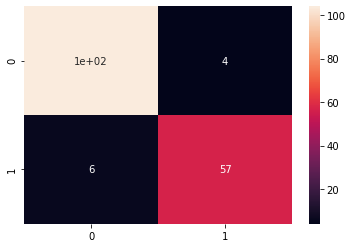

In [43]:
#aPPLYING HYPERPARAMETERS for the Gradient Boosting
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(n_estimators=10,max_depth=3,learning_rate=0.3)
gb.fit(x_train,y_train)
gb_pred_train=gb.predict(x_train)
gb_pred_test=gb.predict(x_test)
gb_pred_proba=gb.predict_proba(x_test)

#metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(gb,x_train,y_train,scoring='accuracy',cv=10)
print("the cross_val_score is:",cvs.mean())
cm=confusion_matrix(y_test,gb_pred_test)
sns.heatmap(cm,annot=True)
print("the accuracy_score is:",accuracy_score(y_test,gb_pred_test))
print(classification_report(y_train,gb_pred_train))
print(classification_report(y_test,gb_pred_test))

In [58]:
#Light Gradient Boosting classifier

from lightgbm import LGBMClassifier
lgbm=LGBMClassifier()
lgbm.fit(x_train,y_train)
lgbm_pred_train=lgbm.predict(x_train)
lgbm_pred_test=lgbm.predict(x_test)
lgbm_pred_proba=lgbm.predict_proba(x_test)

#metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(lgbm,x_train,y_train,scoring='accuracy',cv=10)
print("the cross_val_score is:",cvs.mean())
print("the accuracy_score is:",accuracy_score(y_test,lgbm_pred_test))
cm=confusion_matrix(y_test,lgbm_pred_test)
print(classification_report(y_train,lgbm_pred_train))
print(classification_report(y_test,lgbm_pred_test))

the cross_val_score is: 0.9674358974358974
the accuracy_score is: 0.9766081871345029
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       149

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [59]:
#hyper-parameter tuning
params={
    'n_estimators'    :  [50,100],
    'learning_rate'   :  [0.1,0.2,0.3,0.4]
}

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
random_search=RandomizedSearchCV(lgbm,param_distributions=params,n_jobs=1,verbose=3)
random_search.fit(x_train,y_train)

print(random_search.best_estimator_)
print(random_search.best_params_)

D:\New Volume (D)\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] n_estimators=50, learning_rate=0.1 ..............................
[CV] .. n_estimators=50, learning_rate=0.1, score=0.975, total=   0.4s
[CV] n_estimators=50, learning_rate=0.1 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .. n_estimators=50, learning_rate=0.1, score=0.925, total=   0.3s
[CV] n_estimators=50, learning_rate=0.1 ..............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] .. n_estimators=50, learning_rate=0.1, score=0.975, total=   0.4s
[CV] n_estimators=50, learning_rate=0.1 ..............................
[CV] .. n_estimators=50, learning_rate=0.1, score=0.975, total=   0.2s
[CV] n_estimators=50, learning_rate=0.1 ..............................
[CV] .. n_estimators=50, learning_rate=0.1, score=0.937, total=   0.3s
[CV] n_estimators=100, learning_rate=0.1 .............................
[CV] . n_estimators=100, learning_rate=0.1, score=0.975, total=   0.5s
[CV] n_estimators=100, learning_rate=0.1 .............................
[CV] . n_estimators=100, learning_rate=0.1, score=0.925, total=   0.6s
[CV] n_estimators=100, learning_rate=0.1 .............................
[CV] . n_estimators=100, learning_rate=0.1, score=0.975, total=   1.0s
[CV] n_estimators=100, learning_rate=0.1 .............................
[CV] . n_estimators=100, learning_rate=0.1, score=0.975, total=   0.8s
[CV] n_estimators=100, learning_rate=0.1 .............................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   17.5s finished


LGBMClassifier(learning_rate=0.2, n_estimators=50)
{'n_estimators': 50, 'learning_rate': 0.2}


In [61]:
#Aply hper-parameter for light bgm
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier(n_estimators=50,learning_rate=0.2)
lgbm.fit(x_train,y_train)
lgbm_pred_train=lgbm.predict(x_train)
lgbm_pred_test=lgbm.predict(x_test)
lgbm_pred_proba=lgbm.predict_proba(x_test)

#metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(lgbm,x_train,y_train,scoring='accuracy',cv=10)
print("the cross_val_score is:",cvs.mean())
print("the accuracy_score is:",accuracy_score(y_test,lgbm_pred_test))
cm=confusion_matrix(y_test,lgbm_pred_test)
print(classification_report(y_train,lgbm_pred_train))
print(classification_report(y_test,lgbm_pred_test))

the cross_val_score is: 0.9674358974358974
the accuracy_score is: 0.9883040935672515
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       149

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       108
           1       1.00      0.97      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



D:\New Volume (D)\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:46:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\New Volume (D)\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:46:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:46:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:46:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:46:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

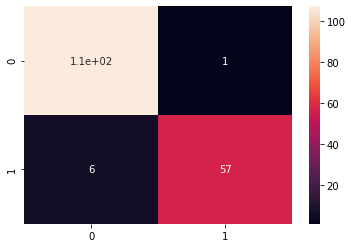

In [27]:
#XG BOOST Classifier
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
xgb_pred_train=xgb.predict(x_train)
xgb_pred_test=xgb.predict(x_test)
xgb_pred_proba=xgb.predict_proba(x_test)

#metrics
from sklearn.metrics  import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(xgb,x_train,y_train,cv=10,scoring='accuracy')
print("the cross_val_score is:",cvs.mean())
print(classification_report(y_train,xgb_pred_train))
print(classification_report(y_test,xgb_pred_test))
print("the accuracy_score is:",accuracy_score(y_test,xgb_pred_test))
cm=confusion_matrix(y_test,knn_pred_test)
sns.heatmap(cm,annot=True)

In [28]:
params={
    'n_estimators'  :  [10,20,30,50,100,200],
    'learning_rate' :  [0.1,0.01,0.2,0.5],
    'max_depth'     :  [3,5,6]
}

 

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
random_search=RandomizedSearchCV(xgb,param_distributions=params,n_jobs=1,n_iter=5,verbose=3)
random_search.fit(x_train,y_train)

print(random_search.best_estimator_)
print(random_search.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_estimators=100, max_depth=5, learning_rate=0.5 ................
[10:46:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\New Volume (D)\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  n_estimators=100, max_depth=5, learning_rate=0.5, score=0.988, total=   0.5s
[CV] n_estimators=100, max_depth=5, learning_rate=0.5 ................
[10:46:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  n_estimators=100, max_depth=5, learning_rate=0.5, score=0.912, total=   0.4s
[CV] n_estimators=100, max_depth=5, learning_rate=0.5 ................
[10:46:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=100, max_depth=5, learning_rate=0.5, score=0.963, total=   0.5s
[CV] n_estimators=100, max_depth=5, learning_rate=0.5 ................
[10:46:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  n_estimators=100, max_depth=5, learning_rate=0.5, score=0.962, total=   0.5s
[CV] n_estimators=100, max_depth=5, learning_rate=0.5 ................
[10:46:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  n_estimators=100, max_depth=5, learning_rate=0.5, score=0.937, tot

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    8.9s finished


[10:47:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
{'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.5}


[10:47:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\New Volume (D)\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:47:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:47:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:47:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:47:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

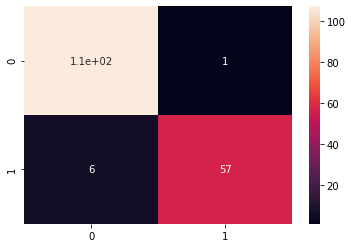

In [29]:
#applying Hyperparameter tuning for xgboost

from xgboost import XGBClassifier
xgb=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=30, n_jobs=4, num_parallel_tree=1,
            random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgb.fit(x_train,y_train)
xgb_pred_train=xgb.predict(x_train)
xgb_pred_test=xgb.predict(x_test)
xgb_pred_proba=xgb.predict_proba(x_test)

#metrics
from sklearn.metrics  import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(xgb,x_train,y_train,cv=10,scoring='accuracy')
print("the cross_val_score is:",cvs.mean())
print(classification_report(y_train,xgb_pred_train))
print(classification_report(y_test,xgb_pred_test))
print("the accuracy_score is:",accuracy_score(y_test,xgb_pred_test))
cm=confusion_matrix(y_test,knn_pred_test)
sns.heatmap(cm,annot=True)

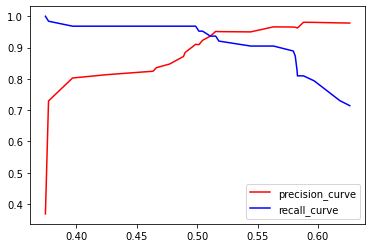

In [30]:
#precision_recall_curve
from sklearn.metrics import precision_recall_curve as prc
precision_points,recall_points,threshold_points=prc(y_test,xgb_pred_proba[:,1])
plt.plot(threshold_points,precision_points[:-1],label="precision_curve",color='red')
plt.plot(threshold_points,recall_points[:-1],label='recall_curve',color='blue')
plt.legend()
plt.show()

#the belowintersection is near to 0.5, which is a very good threshold

# Deep Learning, Artificial Neural Networks

In [31]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

ann=Sequential()

#creating the input and first hidden layer
ann.add(Dense(16,kernel_initializer='uniform',activation='relu',input_shape=(30,)))
ann.add(Dropout(0.6))
#adding the second hidden layer
ann.add(Dense(16,kernel_initializer='uniform',activation='relu'))
ann.add(Dropout(0.6))
#adding the outputlayer
ann.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))

#compiling
ann.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])


ann.fit(x_train,y_train,batch_size=100,epochs=150)

ann_pred_train=ann.predict(x_train)
ann_pred_test=ann.predict(x_test)
ann_pred_test=(ann_pred_test>0.5)





Epoch 1/150
4/4 [==============================] - 4s 9ms/step - loss: 0.6930 - accuracy: 0.5952
Epoch 2/150
4/4 [==============================] - 0s 14ms/step - loss: 0.6920 - accuracy: 0.6527
Epoch 3/150
4/4 [==============================] - 0s 22ms/step - loss: 0.6905 - accuracy: 0.6773
Epoch 4/150
4/4 [==============================] - 0s 13ms/step - loss: 0.6880 - accuracy: 0.7448
Epoch 5/150
4/4 [==============================] - 0s 16ms/step - loss: 0.6859 - accuracy: 0.7371
Epoch 6/150
4/4 [==============================] - 0s 14ms/step - loss: 0.6813 - accuracy: 0.7946
Epoch 7/150
4/4 [==============================] - 0s 14ms/step - loss: 0.6772 - accuracy: 0.7946
Epoch 8/150
4/4 [==============================] - 0s 15ms/step - loss: 0.6690 - accuracy: 0.8423
Epoch 9/150
4/4 [==============================] - 0s 21ms/step - loss: 0.6633 - accuracy: 0.8414
Epoch 10/150
4/4 [==============================] - 0s 17ms/step - loss: 0.6474 - accuracy: 0.8878
Epoch 11/150
4/4 [==

the accuracy_score is: 0.9707602339181286
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



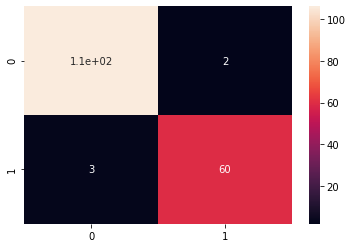

In [32]:
#metrics

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
from sklearn.model_selection import cross_val_score

cm=confusion_matrix(y_test,ann_pred_test)
sns.heatmap(cm,annot=True)
print("the accuracy_score is:",accuracy_score(y_test,ann_pred_test))
print(classification_report(y_test,ann_pred_test))


# roc_curve, roc_auc_score

KNN roc_auc_score is: 0.9839065255731922
naive_bayes roc_auc_score is: 0.9825102880658436
svm roc_auc_score is: 0.9975014697236919
logisticRegression roc_auc_score is: 0.9947089947089948
DecisionTREE roc_auc_score is: 0.9276161081716635
AdaBoost roc_auc_score is: 0.9919165196942974
Gradient Boosting roc_auc_score is: 0.9922104644326867
LightGradientBoosting roc_auc_score is: 0.9988242210464433
XgradientBoosting roc_auc_score is: 0.9792034097589652
the accuracy_score is: 0.9707602339181286


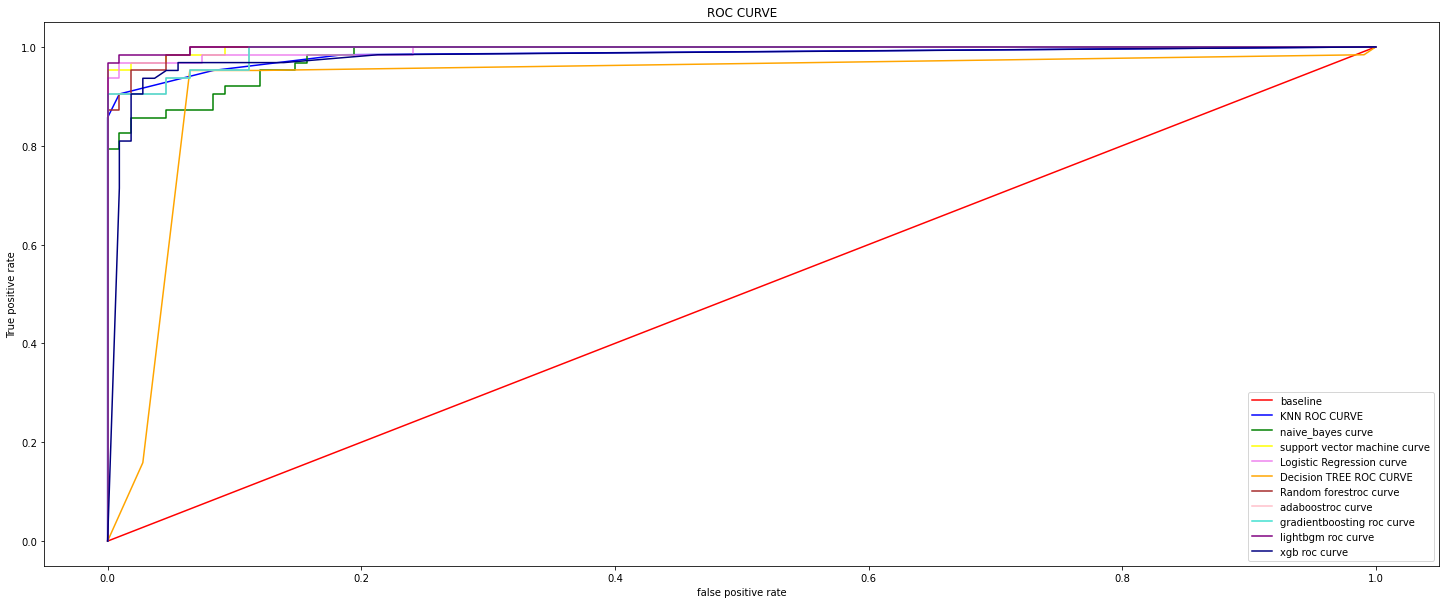

In [66]:
from sklearn.metrics import roc_curve,roc_auc_score
#calculating and printing roc_auc_score
print("KNN roc_auc_score is:",roc_auc_score(y_test,knn_pred_proba[:,1]))
print("naive_bayes roc_auc_score is:",roc_auc_score(y_test,nb_pred_proba[:,1]))
print("svm roc_auc_score is:",roc_auc_score(y_test,svm_pred_proba[:,1]))
print("logisticRegression roc_auc_score is:",roc_auc_score(y_test,lr_pred_proba[:,1]))
print("DecisionTREE roc_auc_score is:",roc_auc_score(y_test,dt_pred_proba[:,1]))
print("AdaBoost roc_auc_score is:",roc_auc_score(y_test,ada_pred_proba[:,1]))
print("Gradient Boosting roc_auc_score is:",roc_auc_score(y_test,gb_pred_proba[:,1]))
print("LightGradientBoosting roc_auc_score is:",roc_auc_score(y_test,lgbm_pred_proba[:,1]))
print("XgradientBoosting roc_auc_score is:",roc_auc_score(y_test,xgb_pred_proba[:,1]))
print("the accuracy_score is:",accuracy_score(y_test,ann_pred_test))

#calculating roc curve
knn_fpr,knn_tpr,threshold=roc_curve(y_test,knn_pred_proba[:,1])
nb_fpr,nb_tpr,threshold=roc_curve(y_test,nb_pred_proba[:,1])
svm_fpr,svm_tpr,threshold=roc_curve(y_test,svm_pred_proba[:,1])
lr_fpr,lr_tpr,threshold=roc_curve(y_test,lr_pred_proba[:,1])
dt_fpr,dt_tpr,threshold=roc_curve(y_test,dt_pred_proba[:,1])
rf_fpr,rf_tpr,threshold=roc_curve(y_test,rf_pred_proba[:,1])
gb_fpr,gb_tpr,threshold=roc_curve(y_test,gb_pred_proba[:,1])
ada_fpr,ada_tpr,threshold=roc_curve(y_test,gb_pred_proba[:,1])
lgbm_fpr,lgbm_tpr,threshold=roc_curve(y_test,lgbm_pred_proba[:,1])
xgb_fpr,xgb_tpr,threshold=roc_curve(y_test,xgb_pred_proba[:,1])

#plotting
plt.figure(figsize=(25,10))
plt.plot([0,1],[0,1],label='baseline',color='red')
plt.plot(knn_fpr,knn_tpr,label='KNN ROC CURVE',color='blue')
plt.plot(nb_fpr,nb_tpr,label='naive_bayes curve',color='green')
plt.plot(svm_fpr,svm_tpr,label='support vector machine curve',color='yellow')
plt.plot(lr_fpr,lr_tpr,label='Logistic Regression curve',color='violet')
plt.plot(dt_fpr,dt_tpr,label='Decision TREE ROC CURVE',color='orange')
plt.plot(rf_fpr,rf_tpr,label='Random forestroc curve',color='brown')
plt.plot(ada_fpr,ada_tpr,label='adaboostroc curve',color='pink')
plt.plot(gb_fpr,gb_tpr,label='gradientboosting roc curve',color='turquoise')
plt.plot(lgbm_fpr,lgbm_tpr,label='lightbgm roc curve',color='purple')
plt.plot(xgb_fpr,xgb_tpr,label='xgb roc curve',color='navy')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title('ROC CURVE')
plt.legend()
plt.show()

# from the above lgbm gives good score
# so,we take lightbgm to proceed further for the picklemodel

# step-4 : Model Deployment
# i)Local Machine
# ii)Heroku cloud
# iii)Google cloud palatform
# iv)Microsoft azure cloud

In [ ]:
#first we will proceed for pickle
import pickle
pickle.dump(lgbm,open('model.pkl','wb'))


# now we got two files i.e,
#Breastcancer_binaryclassfication.ipynb
#model.pkl
# D
#files needed to deploy in local machine

# 1) templates-index.html
# 2)model.pkl
# 3) app.py(production file)
# 4) model.ipynb(optional)
# 5) BreastCancer.csv(optional)
# 6) static/images(optional)

In [ ]:
# for reference, don't  run this
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

# ML model Deployment on Local Machine

In [ ]:
# create a folder in c -  C:\PROJECTS\classification\BreastCancer_BinaryClassification_prediction\local_machine
# goto Anaconda prompt
#(base) C:\Users\Dell>cd C:\PROJECTS\classification\BreastCancer_BinaryClassification_prediction\local_machine

# (base) C:\PROJECTS\classification\BreastCancer_BinaryClassification_prediction\local_machine>python app.py
# a new URL is created on http://127.0.0.1:5000/ and we can predict the needful

# ML model Deployment on Heroku cloud

In [ ]:
#files to be created
# 1) templates-index.html
# 2)model.pkl
# 3) app.py(production file)
# 4) model.ipynb(optional)
# 5) BreastCancer.csv(optional)
# 6) static/images(optional)
#7) procfile
#8) requirements.txt

#to create procfile: notepad-open-web: gunicorn app:app
# to create requirements.txt
#-anaconda pompt:cd c:// 
#-conda create -n project3_env python=3.9   - y
#conda activate project3_env
#pip install numpy,pandas,matplotlib,sklearn,seabon,request,flask,pickle-mixin,gunicorn
#pip freeze >requirements.txt  : automatically it will save into the folder

In [ ]:
# Method-1: using github
#- create all the files in folder C:\PROJECTS\classification\BreastCancer_BinaryClassification_prediction\Heroku cloud\heroku using github
# create a repository in github- BreastCancer_99
# open heroku.com- login
# create a new app:breast-cancer-99
# connect to github-connect reop-deploy branch
# your app was successfully deployed-view
# https://breast-cancer-99.herokuapp.com/


In [ ]:
# Method-2:using Heroku CLI in GIT CMD
# create a new app:  breast-cancer-cli
# open git cmd: cd C:\PROJECTS\classification\BreastCancer_BinaryClassification_prediction\Heroku cloud\heroku using cli
# >heroku login
# >git init
# >heroku git:remote -a breast-cancer-cli
#>git add .
#>git commit -am "make it better"
#>git push heroku main
# https://breast-cancer-cli.herokuapp.com/ deployed to Heroku

# https://breast-cancer-cli.herokuapp.com/ is the website

# ML Deployment on Google Cloud Platform

In [ ]:
#files needed for deployment

# 1) templates-index.html
# 2)model.pkl
# 3) main.py((app.py)production file)
# 4) model.ipynb(optional)
# 5) BreastCancer.csv(optional)
# 6) static/images(optional)
# 7) requirements.txt
#8) app.yaml

In [1]:
# to find app.yaml file
#notebook-open:
#runtime: python38

#tocheck the python version
from platform import python_version
print(python_version()) # so we take python38

3.8.3


In [ ]:
#open https://console.cloud.google.com/
#create an application-project-name/project id: breast-cancer-1111
# app engine-Dashboard-select Breast-cancer-1111
#installclouds sdk
#open cmd prompt
# cd C:\PROJECTS\classification\BreastCancer_BinaryClassification_prediction\Google Cloud Platform
#>gcloud init
#>gcloud app deploy app.yaml --project breast-cancer-1111


# https://breastcancer-1111.as.r.appspot.com/


# ML Deployment on Microsoft Azure

In [ ]:
#portal.azure.com
#files needed for deeployment
# 1) templates-index.html
# 2)model.pkl
# 3) app.py(production file)
# 4) model.ipynb(optional)
# 5) BreastCancer.csv(optional)
# 6) static/images(optional)
#7) requirements.txt